## House Price Model- Advanced Regression

### Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 

The company is looking at prospective properties to buy to enter the market. Build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

**The company wants to know:
Which variables are significant in predicting the price of a house, and
How well those variables describe the price of a house.**

###  Objective:

 **Model the price of houses with the available independent variables.
   Determine the optimal value of lambda for ridge and lasso regression.**
 


### Step 1: Reading and Understanding the Data

In [455]:
# importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [456]:
# Import and read the Data
housing=pd.read_csv("train.csv")
housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [457]:
# Let's check the dimensions of the dataframe
housing.shape

(1460, 81)

In [458]:
# let's look at the statistical aspects of the dataframe
housing.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

7 numerical variables

In [459]:
# Let's see the type of each column
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

#### Data Exploration

To perform linear regression, the (numeric) target variable should be linearly related to *at least one another numeric variable*. Let's see whether that's true in this case.


We'll first subset the list of all (independent) numeric variables

In [460]:
# all numeric (float and int) variables in the dataset
housing_numeric = housing.select_dtypes(include=['float64', 'int64'])
housing_numeric.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 38 columns]

##### Let's calculate age of the house- by construction year and year sold

In [461]:
# Adding age columns
housing['Age'] = housing['YrSold']-housing['YearBuilt']
housing['RemodelAge'] = housing['YrSold']-housing['YearRemodAdd']

In [462]:
# dropping Year colums  and ID
housing_numeric = housing_numeric.drop(['YearBuilt','YearRemodAdd', 'YrSold','Id'], axis=1)
housing_numeric.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  GarageArea  \
0         706           0        150          856  ...         548   
1         978           0        284         1262  ...         460   
2         486           0        434          920  ...         608   
3         216           0        540          756  ...         642   
4         655           0        490         1145  ...         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           0           61              0          0            0         0   
1         298            0              0          0            0         0   
2           0           42              0          0            0         0   
3           0           35            272          0            0         0   
4         192           84              0          0            0         0   

   MiscVal  MoSold  SalePrice  
0        0       2     208500  
1        0       5     181500  
2        0       9     223500  
3        0       2     140000  
4        0      12     250000  

[5 rows x 34 columns]

### Step 2: Data Cleaning and Redifining

#### CheckMissing Values

In [463]:
# check percantage missing values of each column
round(housing.isnull().sum()*100/len(housing.index),2).sort_values(ascending=False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageQual        5.55
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
BsmtFinType2      2.60
BsmtExposure      2.60
BsmtQual          2.53
BsmtCond          2.53
BsmtFinType1      2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
RoofMatl          0.00
RoofStyle         0.00
ExterQual         0.00
Exterior1st       0.00
Exterior2nd       0.00
YearBuilt         0.00
ExterCond         0.00
Foundation        0.00
YearRemodAdd      0.00
RemodelAge        0.00
OverallCond       0.00
                 ...  
OpenPorchSF       0.00
EnclosedPorch     0.00
3SsnPorch         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Fireplaces        0.00
Functional 

We can clearly remove a few columns as most of the data is missing

In [464]:
#Drop PoolQC as it has mre than 50% missing data
housing=housing.drop('PoolQC',axis=1)

#Drop MiscFeature
housing=housing.drop('MiscFeature',axis=1)

#Drop Alley
housing=housing.drop('Alley',axis=1)

#Drop Fence            
housing=housing.drop('Fence',axis=1)

#Drop FireplaceQu
housing=housing.drop('FireplaceQu',axis=1)

#check the dataframe after changes
round(housing.isnull().sum()*100/len(housing.index),2).sort_values(ascending=False)

LotFrontage      17.74
GarageType        5.55
GarageCond        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
LandContour       0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
Foundation        0.00
ExterQual         0.00
ExterCond         0.00
Utilities         0.00
MSSubClass        0.00
BsmtFinSF1        0.00
RoofStyle         0.00
YearRemodAdd      0.00
YearBuilt         0.00
OverallCond       0.00
OverallQual       0.00
BsmtFinSF2        0.00
                 ...  
OpenPorchSF       0.00
EnclosedPorch     0.00
3SsnPorch         0.00
PoolArea          0.00
Fireplaces        0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
GarageCars        0.00
Functional 

##### We will impute values for the others

In [465]:
# check the values in LotFrontage
housing['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
24.0      19
64.0      19
73.0      18
72.0      17
79.0      17
63.0      17
55.0      17
100.0     16
51.0      15
66.0      15
74.0      15
52.0      14
59.0      13
71.0      12
82.0      12
40.0      12
43.0      12
67.0      12
57.0      12
        ... 
129.0      2
124.0      2
118.0      2
101.0      2
122.0      2
121.0      2
115.0      2
109.0      2
116.0      2
114.0      2
150.0      1
111.0      1
153.0      1
182.0      1
46.0       1
112.0      1
149.0      1
141.0      1
33.0       1
152.0      1
160.0      1
168.0      1
128.0      1
144.0      1
39.0       1
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

Replacing null values by mean

In [466]:
housing['LotFrontage'].fillna((housing['LotFrontage'].mean()), inplace=True)

Let's drop the null for BsmtQual and BsmtCond

In [467]:
housing.dropna(subset=['BsmtQual','BsmtCond'],inplace=True)

#check the dataframe after changes
round(housing.isnull().sum()*100/len(housing.index),2).sort_values(ascending=False)

GarageType       5.20
GarageCond       5.20
GarageYrBlt      5.20
GarageFinish     5.20
GarageQual       5.20
MasVnrArea       0.56
MasVnrType       0.56
BsmtExposure     0.07
Electrical       0.07
BsmtFinType2     0.07
LotConfig        0.00
LandSlope        0.00
BsmtFinSF1       0.00
BsmtFinType1     0.00
MSSubClass       0.00
BsmtCond         0.00
MSZoning         0.00
BsmtQual         0.00
Foundation       0.00
ExterCond        0.00
ExterQual        0.00
LotFrontage      0.00
LotArea          0.00
Exterior2nd      0.00
Exterior1st      0.00
RoofMatl         0.00
RoofStyle        0.00
YearRemodAdd     0.00
YearBuilt        0.00
OverallCond      0.00
                 ... 
OpenPorchSF      0.00
EnclosedPorch    0.00
3SsnPorch        0.00
PoolArea         0.00
Fireplaces       0.00
MiscVal          0.00
MoSold           0.00
YrSold           0.00
SaleType         0.00
SaleCondition    0.00
SalePrice        0.00
GarageCars       0.00
Functional       0.00
TotalBsmtSF      0.00
GrLivArea 

In [468]:
housing.dropna(subset=['GarageType'],inplace=True)

#check the dataframe after changes
round(housing.isnull().sum()*100/len(housing.index),2).sort_values(ascending=False)

MasVnrType       0.59
MasVnrArea       0.59
Electrical       0.07
BsmtFinType2     0.07
BsmtExposure     0.07
RemodelAge       0.00
ExterCond        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
ExterQual        0.00
BsmtQual         0.00
Foundation       0.00
YearRemodAdd     0.00
BsmtCond         0.00
BsmtFinType1     0.00
BsmtFinSF1       0.00
BsmtFinSF2       0.00
RoofStyle        0.00
YearBuilt        0.00
TotalBsmtSF      0.00
Utilities        0.00
MSSubClass       0.00
MSZoning         0.00
LotFrontage      0.00
LotArea          0.00
Street           0.00
LotShape         0.00
LandContour      0.00
LotConfig        0.00
                 ... 
EnclosedPorch    0.00
ScreenPorch      0.00
HeatingQC        0.00
PoolArea         0.00
MiscVal          0.00
MoSold           0.00
YrSold           0.00
SaleType         0.00
SaleCondition    0.00
SalePrice        0.00
GarageCars       0.00
GarageFinish     0.00
GarageYrBlt      0.00
GarageType       0.00
CentralAir

In [469]:
housing.dropna(subset=['MasVnrType','Electrical'],inplace=True)

#check the dataframe after changes
round(housing.isnull().sum()*100/len(housing.index),2).sort_values(ascending=False)

BsmtFinType2     0.07
BsmtExposure     0.07
RemodelAge       0.00
ExterCond        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
MasVnrType       0.00
MasVnrArea       0.00
ExterQual        0.00
BsmtQual         0.00
Foundation       0.00
YearRemodAdd     0.00
BsmtCond         0.00
BsmtFinType1     0.00
BsmtFinSF1       0.00
BsmtFinSF2       0.00
BsmtUnfSF        0.00
RoofStyle        0.00
YearBuilt        0.00
Age              0.00
Utilities        0.00
MSSubClass       0.00
MSZoning         0.00
LotFrontage      0.00
LotArea          0.00
Street           0.00
LotShape         0.00
LandContour      0.00
LotConfig        0.00
                 ... 
EnclosedPorch    0.00
ScreenPorch      0.00
CentralAir       0.00
PoolArea         0.00
MiscVal          0.00
MoSold           0.00
YrSold           0.00
SaleType         0.00
SaleCondition    0.00
SalePrice        0.00
GarageCars       0.00
GarageFinish     0.00
GarageYrBlt      0.00
GarageType       0.00
Electrical

In [470]:
housing.dropna(subset=['BsmtFinType2','BsmtExposure'],inplace=True)

#check the dataframe after changes
round(housing.isnull().sum()*100/len(housing.index),2).sort_values(ascending=False)

RemodelAge       0.0
Foundation       0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
BsmtQual         0.0
YearRemodAdd     0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
RoofStyle        0.0
YearBuilt        0.0
Age              0.0
Utilities        0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
LotConfig        0.0
                ... 
EnclosedPorch    0.0
ScreenPorch      0.0
CentralAir       0.0
PoolArea         0.0
MiscVal          0.0
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
GarageCars       0.0
GarageFinish     0.0
GarageYrBlt      0.0
GarageType       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF     

#### There are no null values now

In [471]:
# dropping Year columns  as there is an age column
housing = housing.drop(['YearBuilt','YearRemodAdd', 'YrSold'], axis=1)

In [472]:
#Check numeric columns
# all numeric (float and int) variables in the dataset
housing_numeric = housing.select_dtypes(include=['float64', 'int64'])
housing_numeric.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0   1          60         65.0     8450            7            5       196.0   
1   2          20         80.0     9600            6            8         0.0   
2   3          60         68.0    11250            7            5       162.0   
3   4          70         60.0     9550            7            5         0.0   
4   5          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  OpenPorchSF  EnclosedPorch  \
0         706           0        150  ...           61              0   
1         978           0        284  ...            0              0   
2         486           0        434  ...           42              0   
3         216           0        540  ...           35            272   
4         655           0        490  ...           84              0   

   3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  Age  \
0          0            0         0        0       2     208500    5   
1          0            0         0        0       5     181500   31   
2          0            0         0        0       9     223500    7   
3          0            0         0        0       2     140000   91   
4          0            0         0        0      12     250000    8   

   RemodelAge  
0           5  
1          31  
2           6  
3          36  
4           8  

[5 rows x 37 columns]

In [473]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Data columns (total 75 columns):
Id               1338 non-null int64
MSSubClass       1338 non-null int64
MSZoning         1338 non-null object
LotFrontage      1338 non-null float64
LotArea          1338 non-null int64
Street           1338 non-null object
LotShape         1338 non-null object
LandContour      1338 non-null object
Utilities        1338 non-null object
LotConfig        1338 non-null object
LandSlope        1338 non-null object
Neighborhood     1338 non-null object
Condition1       1338 non-null object
Condition2       1338 non-null object
BldgType         1338 non-null object
HouseStyle       1338 non-null object
OverallQual      1338 non-null int64
OverallCond      1338 non-null int64
RoofStyle        1338 non-null object
RoofMatl         1338 non-null object
Exterior1st      1338 non-null object
Exterior2nd      1338 non-null object
MasVnrType       1338 non-null object
MasVnrArea       1338 n

#### Check categorical columns

In [474]:
#Check the values 
housing['MSZoning'].value_counts()

RL         1066
RM          191
FV           62
RH           11
C (all)       8
Name: MSZoning, dtype: int64

In [475]:
#Let's merge the outliers into "Others"
housing['MSZoning']=housing['MSZoning'].replace(to_replace=['RM','FV','RH','C (all)'], value='Others')
housing['MSZoning'].value_counts()

RL        1066
Others     272
Name: MSZoning, dtype: int64

In [476]:
#Check Street
housing['Street'].value_counts()

Pave    1333
Grvl       5
Name: Street, dtype: int64

In [477]:
# almost all the values are same hence drop  the column
housing=housing.drop('Street' , axis=1)

In [478]:
#Check the values 
housing['LotShape'].value_counts()

Reg    829
IR1    459
IR2     40
IR3     10
Name: LotShape, dtype: int64

In [479]:
#Let's merge the outliers into "Others"
housing['LotShape']=housing['LotShape'].replace(to_replace=['IR2','IR3','IR1'], value='IR')
housing['LotShape'].value_counts()

Reg    829
IR     509
Name: LotShape, dtype: int64

In [480]:
#Check the values 
housing['LandContour'].value_counts()

Lvl    1206
Bnk      52
HLS      48
Low      32
Name: LandContour, dtype: int64

In [481]:
#Check the values 
housing['Utilities'].value_counts()

AllPub    1337
NoSeWa       1
Name: Utilities, dtype: int64

In [482]:
# Drop the column as not much variance
housing=housing.drop('Utilities' , axis=1)

In [483]:
#Check the values 
housing['LotConfig'].value_counts()

Inside     957
Corner     244
CulDSac     90
FR2         43
FR3          4
Name: LotConfig, dtype: int64

In [484]:
#Let's merge the outliers into "Others"
housing['LotConfig']=housing['LotConfig'].replace(to_replace=['CulDSac','FR2','FR3'], value='Others')
housing['LotConfig'].value_counts()

Inside    957
Corner    244
Others    137
Name: LotConfig, dtype: int64

In [485]:
#Check the values 
housing['LandSlope'].value_counts()

Gtl    1265
Mod      61
Sev      12
Name: LandSlope, dtype: int64

In [486]:
# Drop the column as not much variance
housing=housing.drop('LandSlope' , axis=1)

In [487]:
#Check the values 
housing['Neighborhood'].value_counts()

NAmes      209
CollgCr    146
OldTown    100
Somerst     83
Gilbert     77
NridgHt     75
NWAmes      73
Edwards     70
Sawyer      69
SawyerW     53
Crawfor     50
BrkSide     47
Mitchel     42
NoRidge     41
Timber      37
IDOTRR      29
ClearCr     26
StoneBr     25
SWISU       20
Blmngtn     17
BrDale      15
MeadowV     12
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [488]:
#Check the values 
housing['Condition1'].value_counts()

Norm      1162
Feedr       63
Artery      43
RRAn        26
PosN        19
RRAe        10
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [489]:
# Drop the column as not much variance
housing=housing.drop(['Condition1','Condition2'] , axis=1)

In [490]:
#Check the values 
housing['BldgType'].value_counts()

1Fam      1138
TwnhsE     112
Twnhs       38
Duplex      28
2fmCon      22
Name: BldgType, dtype: int64

In [491]:
#Let's merge the outliers into "Others"
housing['BldgType']=housing['BldgType'].replace(to_replace=['TwnhsE','Twnhs','Duplex','2fmCon'], value='Others')
housing['BldgType'].value_counts()

1Fam      1138
Others     200
Name: BldgType, dtype: int64

In [492]:
#Check the values 
housing['HouseStyle'].value_counts()

1Story    657
2Story    426
1.5Fin    134
SLvl       64
SFoyer     30
1.5Unf     11
2.5Unf     10
2.5Fin      6
Name: HouseStyle, dtype: int64

In [493]:
#Check the values 
housing['RoofStyle'].value_counts()

Gable      1037
Hip         272
Flat         11
Gambrel      10
Mansard       6
Shed          2
Name: RoofStyle, dtype: int64

In [494]:
#Let's merge the outliers into "Others"
housing['RoofStyle']=housing['RoofStyle'].replace(to_replace=['Flat','Gambrel','Mansard','Shed'], value='Others')
housing['RoofStyle'].value_counts()

Gable     1037
Hip        272
Others      29
Name: RoofStyle, dtype: int64

In [495]:
#Check the values 
housing['RoofMatl'].value_counts()

CompShg    1314
Tar&Grv       9
WdShngl       6
WdShake       5
ClyTile       1
Roll          1
Metal         1
Membran       1
Name: RoofMatl, dtype: int64

In [496]:
# Drop the column as not much variance
housing=housing.drop(['RoofMatl'] , axis=1)

In [497]:
#Check the values 
housing['Exterior1st'].value_counts()

VinylSd    486
HdBoard    211
MetalSd    201
Wd Sdng    183
Plywood    100
CemntBd     52
BrkFace     44
Stucco      21
WdShing     20
AsbShng     15
Stone        2
ImStucc      1
BrkComm      1
CBlock       1
Name: Exterior1st, dtype: int64

In [498]:
# Drop the column Exterior2nd
housing=housing.drop(['Exterior2nd'] , axis=1)

In [499]:
#Check the values 
housing['MasVnrType'].value_counts()

None       763
BrkFace    432
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [500]:
#Check the values 
housing['ExterQual'].value_counts()

TA    803
Gd    477
Ex     51
Fa      7
Name: ExterQual, dtype: int64

In [501]:
#Check the values 
housing['ExterCond'].value_counts()

TA    1183
Gd     137
Fa      16
Ex       2
Name: ExterCond, dtype: int64

In [502]:
#Check the values 
housing['Foundation'].value_counts()

PConc     620
CBlock    580
BrkTil    129
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [503]:
#Let's merge the outliers into "Others"
housing['Foundation']=housing['Foundation'].replace(to_replace=['BrkTil','Stone','Wood'], value='Others')
housing['Foundation'].value_counts()

PConc     620
CBlock    580
Others    138
Name: Foundation, dtype: int64

In [504]:
#Check the values 
housing['BsmtQual'].value_counts()

TA    594
Gd    592
Ex    120
Fa     32
Name: BsmtQual, dtype: int64

In [505]:
#Check the values 
housing['BsmtCond'].value_counts()

TA    1237
Gd      62
Fa      38
Po       1
Name: BsmtCond, dtype: int64

In [506]:
#Check the values 
housing['BsmtExposure'].value_counts()

No    887
Av    213
Gd    127
Mn    111
Name: BsmtExposure, dtype: int64

In [507]:
#Check the values 
housing['BsmtFinType1'].value_counts()

GLQ    402
Unf    392
ALQ    209
BLQ    141
Rec    125
LwQ     69
Name: BsmtFinType1, dtype: int64

In [508]:
#Check the values 
housing['BsmtFinType2'].value_counts()

Unf    1176
Rec      53
LwQ      46
BLQ      32
ALQ      19
GLQ      12
Name: BsmtFinType2, dtype: int64

In [509]:
#Check the values 
housing['Heating'].value_counts()

GasA    1318
GasW      16
Grav       3
OthW       1
Name: Heating, dtype: int64

In [510]:
# Drop the column as no variance
housing=housing.drop(['Heating'] , axis=1)

In [511]:
#Check the values 
housing['HeatingQC'].value_counts()

Ex    704
TA    380
Gd    217
Fa     36
Po      1
Name: HeatingQC, dtype: int64

In [512]:
#Check the values 
housing['Electrical'].value_counts()

SBrkr    1242
FuseA      76
FuseF      17
FuseP       2
Mix         1
Name: Electrical, dtype: int64

In [513]:
#Check the values 
housing['KitchenQual'].value_counts()

TA    650
Gd    568
Ex     97
Fa     23
Name: KitchenQual, dtype: int64

In [514]:
#Check the values 
housing['Functional'].value_counts()

Typ     1254
Min2      30
Min1      28
Mod       11
Maj1      10
Maj2       4
Sev        1
Name: Functional, dtype: int64

In [515]:
#Check the values 
housing['GarageType'].value_counts()

Attchd     852
Detchd     369
BuiltIn     85
Basment     19
CarPort      7
2Types       6
Name: GarageType, dtype: int64

In [516]:
#Let's merge the outliers into "Others"
housing['GarageType']=housing['GarageType'].replace(to_replace=['BuiltIn','Basment','CarPort','2Types'], value='Others')
housing['GarageType'].value_counts()

Attchd    852
Detchd    369
Others    117
Name: GarageType, dtype: int64

In [517]:
#Check the values 
housing['GarageFinish'].value_counts()

Unf    580
RFn    413
Fin    345
Name: GarageFinish, dtype: int64

In [518]:
#Check the values 
housing['GarageQual'].value_counts()

TA    1270
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [519]:
#Check the values 
housing['GarageCond'].value_counts()

TA    1287
Fa      33
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [520]:
# Drop the column as no variance
housing=housing.drop(['GarageCond'] , axis=1)

In [521]:
#Check the values 
housing['PavedDrive'].value_counts()

Y    1257
N      54
P      27
Name: PavedDrive, dtype: int64

In [522]:
#Check the values 
housing['SaleType'].value_counts()

WD       1158
New       117
COD        42
ConLD       6
CWD         4
ConLI       4
ConLw       4
Con         2
Oth         1
Name: SaleType, dtype: int64

In [523]:
#Check the values 
housing['SaleCondition'].value_counts()

Normal     1104
Partial     120
Abnorml      86
Family       20
Alloca        7
AdjLand       1
Name: SaleCondition, dtype: int64

In [524]:
#Check dataset
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Data columns (total 66 columns):
Id               1338 non-null int64
MSSubClass       1338 non-null int64
MSZoning         1338 non-null object
LotFrontage      1338 non-null float64
LotArea          1338 non-null int64
LotShape         1338 non-null object
LandContour      1338 non-null object
LotConfig        1338 non-null object
Neighborhood     1338 non-null object
BldgType         1338 non-null object
HouseStyle       1338 non-null object
OverallQual      1338 non-null int64
OverallCond      1338 non-null int64
RoofStyle        1338 non-null object
Exterior1st      1338 non-null object
MasVnrType       1338 non-null object
MasVnrArea       1338 non-null float64
ExterQual        1338 non-null object
ExterCond        1338 non-null object
Foundation       1338 non-null object
BsmtQual         1338 non-null object
BsmtCond         1338 non-null object
BsmtExposure     1338 non-null object
BsmtFinType1     1338 

### Step 3: Data Preparation

#### Yes/No Values to 1/0

In [525]:
#check yes/no columns and convert to 1/0

bool_cols = [ col for col in housing
            if np.isin(housing[col].unique(),["Yes","No","Y","N"]).all()]
bool_cols

['CentralAir']

In [526]:
#Check the values 
housing['CentralAir'].value_counts()

Y    1277
N      61
Name: CentralAir, dtype: int64

In [527]:
#Convert 
housing['CentralAir'] = housing['CentralAir'].map({'Y': 1, 'N': 0})
#Check the values 
housing['CentralAir'].value_counts()

1    1277
0      61
Name: CentralAir, dtype: int64

#### Dummy Variable Creation

In [528]:
# all categorical(object) variables in the dataset
housing_cat = housing.select_dtypes(include=['object'])
housing_cat.head()

MSZoning LotShape LandContour LotConfig Neighborhood BldgType HouseStyle  \
0       RL      Reg         Lvl    Inside      CollgCr     1Fam     2Story   
1       RL      Reg         Lvl    Others      Veenker     1Fam     1Story   
2       RL       IR         Lvl    Inside      CollgCr     1Fam     2Story   
3       RL       IR         Lvl    Corner      Crawfor     1Fam     2Story   
4       RL       IR         Lvl    Others      NoRidge     1Fam     2Story   

  RoofStyle Exterior1st MasVnrType  ... HeatingQC Electrical KitchenQual  \
0     Gable     VinylSd    BrkFace  ...        Ex      SBrkr          Gd   
1     Gable     MetalSd       None  ...        Ex      SBrkr          TA   
2     Gable     VinylSd    BrkFace  ...        Ex      SBrkr          Gd   
3     Gable     Wd Sdng       None  ...        Gd      SBrkr          Gd   
4     Gable     VinylSd    BrkFace  ...        Ex      SBrkr          Gd   

  Functional GarageType GarageFinish GarageQual PavedDrive SaleType  \
0        Typ     Attchd          RFn         TA          Y       WD   
1        Typ     Attchd          RFn         TA          Y       WD   
2        Typ     Attchd          RFn         TA          Y       WD   
3        Typ     Detchd          Unf         TA          Y       WD   
4        Typ     Attchd          RFn         TA          Y       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal  

[5 rows x 28 columns]

In [529]:
#List categorical features
catfeatures = housing_cat.columns

# Create dummies and drop the first column
housing_cat = pd.get_dummies(housing[catfeatures], drop_first = True)

#Adding the results to the master dataframe
housing = pd.concat([housing,housing_cat],axis=1)

#Drop category columns
housing=housing.drop(catfeatures , axis=1)

#Check dataset
housing.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0   1          60         65.0     8450            7            5       196.0   
1   2          20         80.0     9600            6            8         0.0   
2   3          60         68.0    11250            7            5       162.0   
3   4          70         60.0     9550            7            5         0.0   
4   5          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  SaleType_ConLI  SaleType_ConLw  \
0         706           0        150  ...               0               0   
1         978           0        284  ...               0               0   
2         486           0        434  ...               0               0   
3         216           0        540  ...               0               0   
4         655           0        490  ...               0               0   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  \
0             0             0            1                      0   
1             0             0            1                      0   
2             0             0            1                      0   
3             0             0            1                      0   
4             0             0            1                      0   

   SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                     0                     0                     1   
1                     0                     0                     1   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     1   

   SaleCondition_Partial  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 162 columns]

In [530]:
housing.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1338.000000  1338.000000  1338.000000    1338.000000  1338.000000   
mean    731.228700    56.136024    70.630187   10706.294469     6.219731   
std     421.779691    41.252576    22.161578   10336.621126     1.324472   
min       1.000000    20.000000    21.000000    1300.000000     2.000000   
25%     366.250000    20.000000    60.000000    7744.000000     5.000000   
50%     730.500000    50.000000    70.049958    9600.000000     6.000000   
75%    1098.750000    70.000000    80.000000   11760.750000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  ...  \
count  1338.000000  1338.000000  1338.000000  1338.000000  1338.000000  ...   
mean      5.596413   110.360239   464.234679    49.218236   582.494768  ...   
std       1.078124   185.604816   458.792420   166.196584   439.950528  ...   
min       2.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       5.000000     0.000000     0.000000     0.000000   248.000000  ...   
50%       5.000000     0.000000   413.000000     0.000000   489.000000  ...   
75%       6.000000   174.000000   733.000000     0.000000   815.750000  ...   
max       9.000000  1600.000000  5644.000000  1474.000000  2336.000000  ...   

       SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
count     1338.000000     1338.000000   1338.000000   1338.000000   
mean         0.002990        0.002990      0.087444      0.000747   
std          0.054615        0.054615      0.282590      0.027338   
min          0.000000        0.000000      0.000000      0.000000   
25%          0.000000        0.000000      0.000000      0.000000   
50%          0.000000        0.000000      0.000000      0.000000   
75%          0.000000        0.000000      0.000000      0.000000   
max          1.000000        1.000000      1.000000      1.000000   

       SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
count  1338.000000            1338.000000           1338.000000   
mean      0.865471               0.000747              0.005232   
std       0.341348               0.027338              0.072168   
min       0.000000               0.000000              0.000000   
25%       1.000000               0.000000              0.000000   
50%       1.000000               0.000000              0.000000   
75%       1.000000               0.000000              0.000000   
max       1.000000               1.000000              1.000000   

       SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
count           1338.000000           1338.000000            1338.000000  
mean               0.014948              0.825112               0.089686  
std                0.121389              0.380013               0.285838  
min                0.000000              0.000000               0.000000  
25%                0.000000              1.000000               0.000000  
50%                0.000000              1.000000               0.000000  
75%                0.000000              1.000000               0.000000  
max                1.000000              1.000000               1.000000  

[8 rows x 162 columns]

#### Correlation Matrix

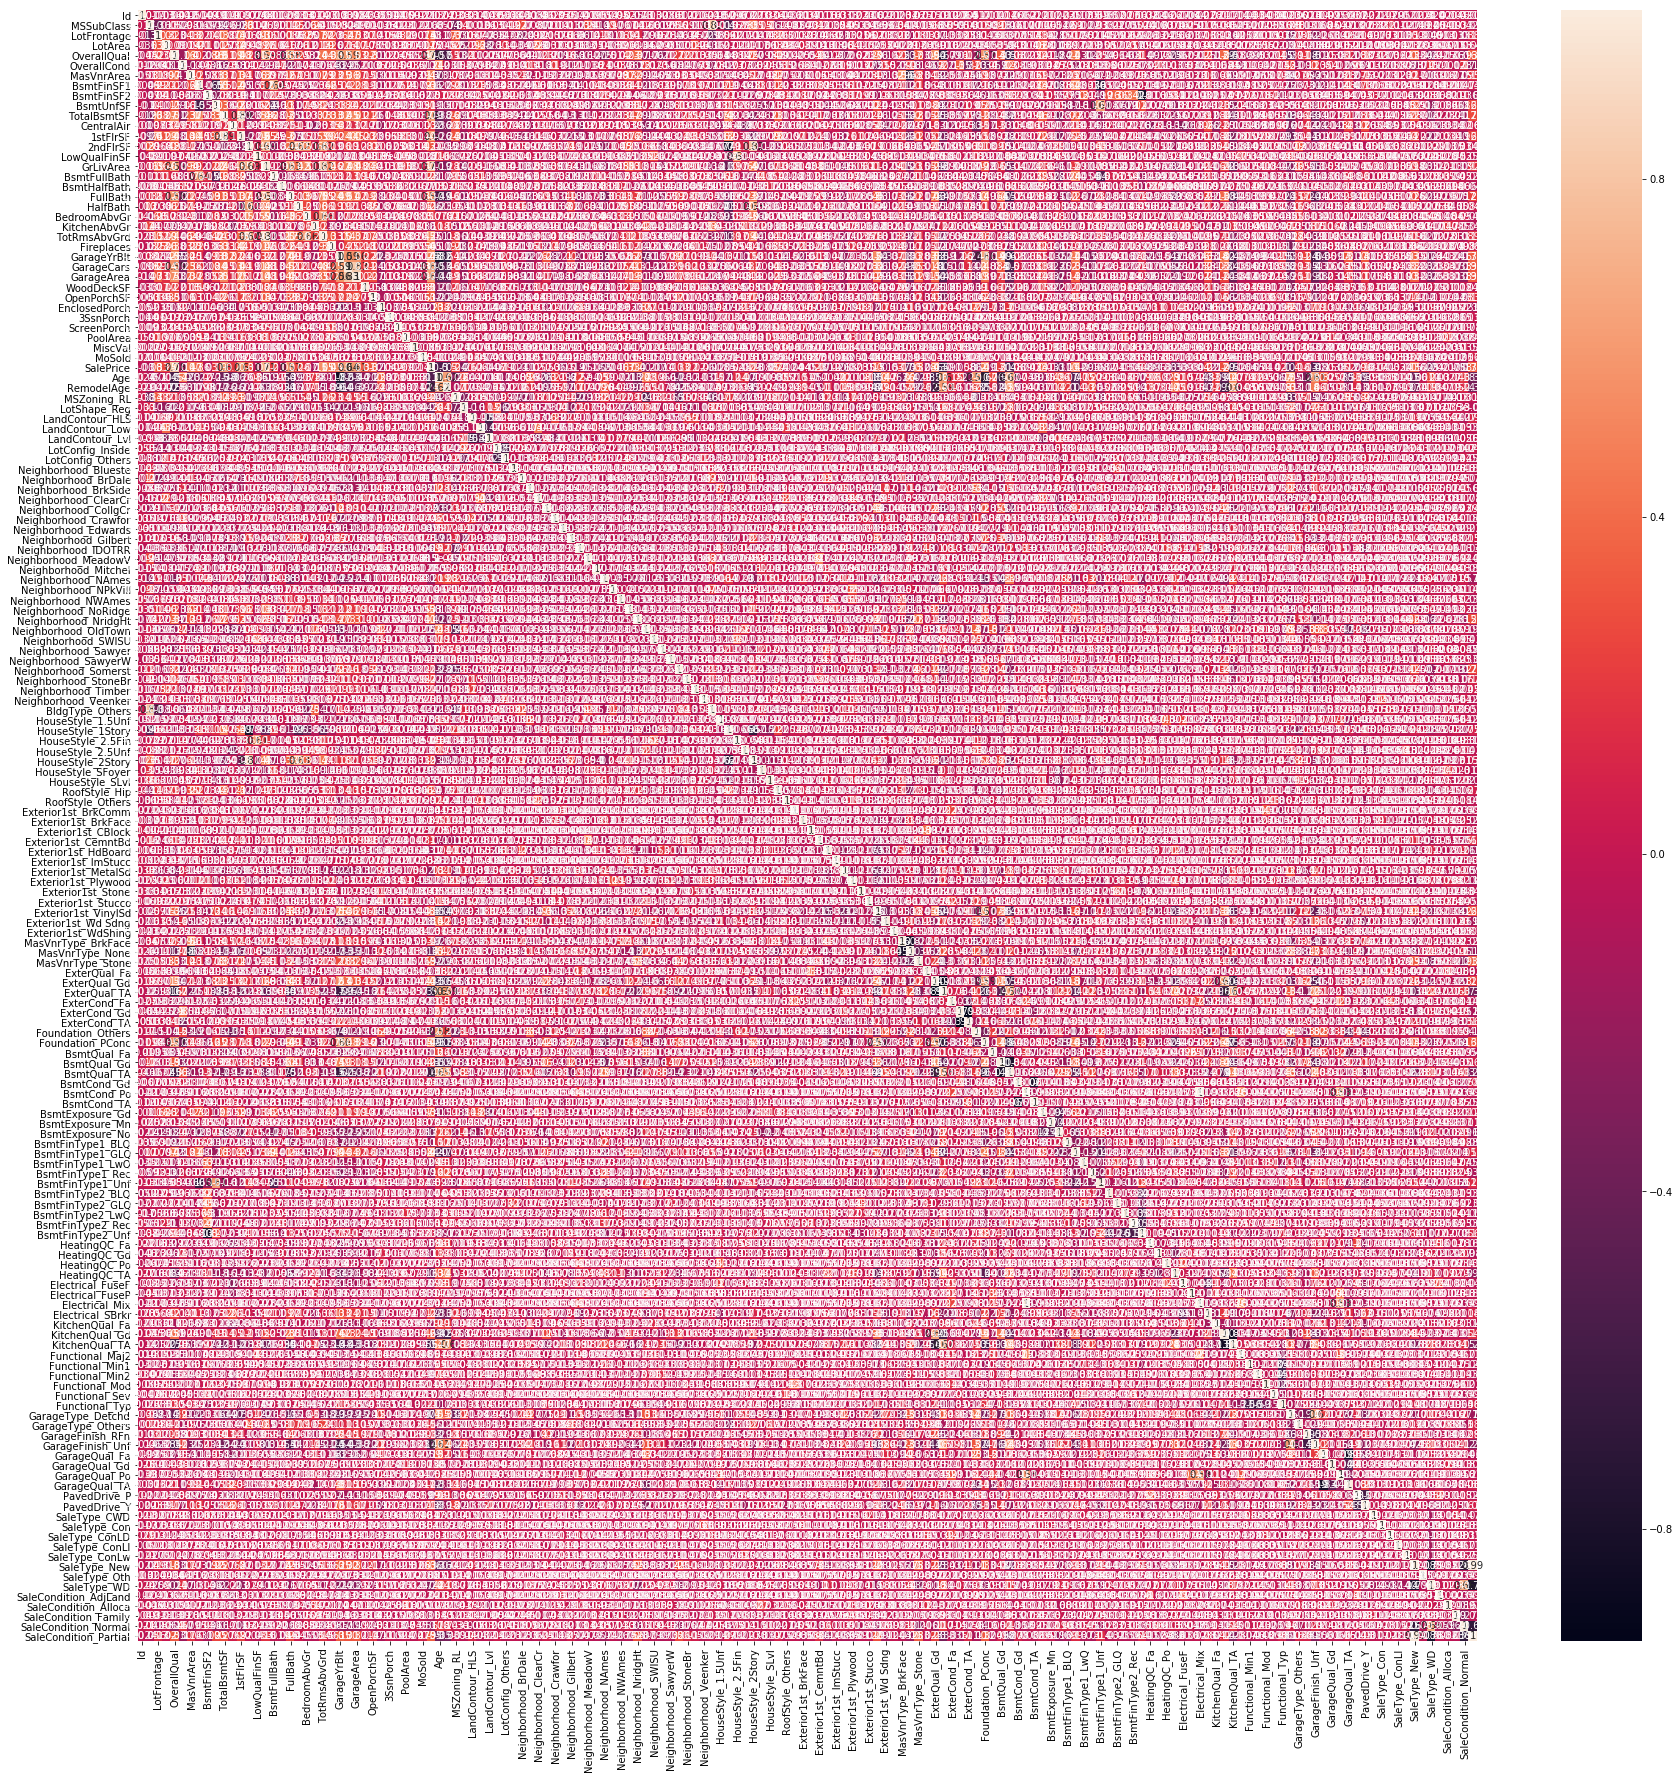

In [531]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,30))        # Size of the figure
sns.heatmap(housing.corr(),annot = True)

In [532]:
#Check correlation matrix
housing.corr()

Id  MSSubClass  LotFrontage   LotArea  \
Id                     1.000000    0.016725    -0.013304 -0.036083   
MSSubClass             0.016725    1.000000    -0.358294 -0.134158   
LotFrontage           -0.013304   -0.358294     1.000000  0.300018   
LotArea               -0.036083   -0.134158     0.300018  1.000000   
OverallQual           -0.044455    0.051690     0.225559  0.090451   
OverallCond            0.011850   -0.098153    -0.042652  0.001415   
MasVnrArea            -0.051038    0.031333     0.176176  0.096727   
BsmtFinSF1            -0.004919   -0.069053     0.220518  0.210148   
BsmtFinSF2            -0.004908   -0.079329     0.039984  0.110493   
BsmtUnfSF             -0.010196   -0.141025     0.103440 -0.014589   
TotalBsmtSF           -0.018637   -0.263613     0.378065  0.267188   
CentralAir             0.010435   -0.098242     0.072504  0.034059   
1stFlrSF               0.009750   -0.258787     0.410514  0.288502   
2ndFlrSF              -0.002866    0.306709     0.067565  0.047773   
LowQualFinSF          -0.047958    0.019990     0.010343  0.009729   
GrLivArea              0.001067    0.068782     0.362855  0.255445   
BsmtFullBath           0.010210   -0.011317     0.103041  0.160687   
BsmtHalfBath          -0.028333   -0.000151    -0.000851  0.046420   
FullBath              -0.000334    0.117720     0.172434  0.115727   
HalfBath              -0.013197    0.197520     0.038287  0.006052   
BedroomAbvGr           0.041290   -0.065699     0.246407  0.120369   
KitchenAbvGr           0.013834    0.239177     0.007716 -0.012611   
TotRmsAbvGrd           0.022852    0.014514     0.320910  0.185654   
Fireplaces            -0.017839   -0.024752     0.229304  0.263061   
GarageYrBlt           -0.003114    0.082040     0.063620 -0.025700   
GarageCars             0.009797    0.006872     0.268568  0.138228   
GarageArea             0.013658   -0.070278     0.332616  0.168630   
WoodDeckSF            -0.032801   -0.010175     0.069668  0.167822   
OpenPorchSF           -0.005332   -0.000359     0.143891  0.084942   
EnclosedPorch          0.005106   -0.022598     0.015031 -0.017968   
...                         ...         ...          ...       ...   
KitchenQual_TA        -0.013817   -0.024783    -0.120795 -0.026507   
Functional_Maj2       -0.014349   -0.031386     0.005240 -0.003469   
Functional_Min1       -0.030556   -0.026819    -0.030945  0.024556   
Functional_Min2        0.034042   -0.002948    -0.000149  0.005529   
Functional_Mod        -0.003858   -0.005519     0.011253  0.061712   
Functional_Sev        -0.004166    0.002563    -0.000716  0.020496   
Functional_Typ        -0.002257   -0.007814     0.034804 -0.029934   
GarageType_Detchd      0.003612    0.088441    -0.268768 -0.138356   
GarageType_Others     -0.000243    0.110488     0.085591  0.042080   
GarageFinish_RFn       0.012769   -0.031355     0.119023  0.000385   
GarageFinish_Unf      -0.014168    0.006806    -0.219811 -0.084244   
GarageQual_Fa          0.009913   -0.025292    -0.063337 -0.028943   
GarageQual_Gd          0.024978    0.063961    -0.014148  0.004285   
GarageQual_Po         -0.038703    0.037013    -0.019894 -0.005224   
GarageQual_TA         -0.003740   -0.012605     0.061535  0.021398   
PavedDrive_P           0.020143   -0.021998    -0.014351  0.011764   
PavedDrive_Y          -0.021663   -0.003267     0.069395 -0.016948   
SaleType_CWD           0.022049    0.031689    -0.007737 -0.008891   
SaleType_Con          -0.017090    0.031773    -0.032538 -0.003607   
SaleType_ConLD         0.028935    0.109367     0.030937  0.002375   
SaleType_ConLI        -0.049545    0.011770     0.013304  0.000232   
SaleType_ConLw        -0.021264    0.026709    -0.049758 -0.012137   
SaleType_New          -0.022131   -0.049269     0.127588  0.017550   
SaleType_Oth           0.030472   -0.023965     0.000457 -0.003582   
SaleType_WD            0.024220    0.025468    -0.090494 -0.001004   
SaleCondition_AdjLand -0.020253   -0.00

#### Splitting Data into Training and Test Sets

In [533]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = housing.drop(['Id'],axis=1)

# Putting response variable to y
y = housing['SalePrice']


#### Scaling

In [534]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=161)

In [535]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

### Step 5: Model Building and Evaluation
### Ridge and Lasso Regression

#### Ridge Regression

In [536]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_ridge.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [537]:
ridge_results = pd.DataFrame(model_ridge.cv_results_)
ridge_results = ridge_results[ridge_results['param_alpha']<=200]
ridge_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.004787  3.993515e-04         0.001198        0.000398      0.0001   
1       0.004787  4.005197e-04         0.001396        0.000488       0.001   
2       0.004988  3.504023e-07         0.000997        0.000001        0.01   
3       0.004588  4.887930e-04         0.001396        0.000488        0.05   
4       0.005187  1.465526e-03         0.001796        0.000748         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.030453          -0.024692          -0.043797   
1   {'alpha': 0.001}          -0.304524          -0.246915          -0.437958   
2    {'alpha': 0.01}          -3.044493          -2.468617          -4.378095   
3    {'alpha': 0.05}         -15.205833         -12.331208         -21.857454   
4     {'alpha': 0.1}         -30.370260         -24.632829         -43.632733   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.018937  ...        -0.030328        0.008418                1   
1          -0.189366  ...        -0.303270        0.084180                2   
2          -1.893319  ...        -3.031890        0.841414                3   
3          -9.459052  ...       -15.141499        4.198409                4   
4         -18.899294  ...       -30.238307        8.375277                5   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.021140           -0.020508           -0.028783   
1           -0.211397           -0.205078           -0.287818   
2           -2.113519           -2.050423           -2.877252   
3          -10.557627          -10.244114          -14.365713   
4          -21.090402          -20.468273          -28.680279   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.019262           -0.021460         -0.022231         0.003361  
1           -0.192614           -0.214594         -0.222300         0.033612  
2           -1.925810           -2.145470         -2.222495         0.335901  
3           -9.621680          -10.716863        -11.101200         1.674742  
4          -19.224975          -21.407591        -22.174304         3.337648  

[5 rows x 21 columns]

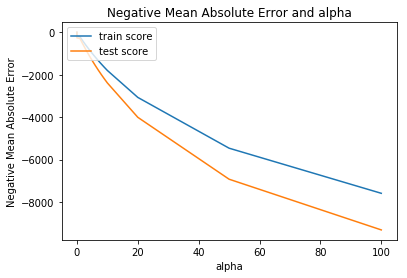

In [538]:
# plotting mean test and train scoes with alpha 
ridge_results['param_alpha'] = ridge_results['param_alpha'].astype('int32')

# plotting
plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [539]:
#checking the value of optimum number of parameters
print(model_ridge.best_params_)
print(model_ridge.best_score_)

{'alpha': 0.0001}
-0.03032780304190063


In [609]:
## Taking alpha = .0001 from graph
alpha = .0001
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-4.14266218e-03,  7.62764223e-04,  6.75985195e-03,  1.03603435e-02,
        7.23402513e-03,  2.21803072e-03,  8.01260862e-03,  7.04304791e-04,
       -2.57254356e-04,  9.18680926e-03, -5.04568125e-04,  2.82763001e-03,
        1.96772912e-02,  2.30890086e-03,  1.89000989e-02,  9.08803132e-04,
        7.53944794e-05,  5.66608143e-04,  1.78296574e-04, -3.72043353e-03,
       -4.17652532e-03,  7.02564741e-03,  2.08461785e-03, -4.22538003e-03,
        1.35932708e-03,  5.62629501e-03,  2.72463939e-03, -9.74733668e-04,
        1.72464298e-03,  6.63282612e-04,  2.35825643e-03,  5.49993333e-03,
       -4.21389393e-04, -6.22286827e-04,  7.88842641e+04, -1.13381859e-02,
       -2.11560899e-03, -3.61981630e-04, -5.10645079e-04,  5.10085259e-03,
        1.17366764e-03,  6.75860977e-03, -1.38904799e-03, -4.13087649e-04,
       -2.08655095e-04,  1.88830218e-04, -1.15953642e-05, -3.74618670e-04,
       -3.45166143e-04,  3.77406955e-03, -4.77659030e-03, -3.14569266e-04,
       -2.06572765e-03,  

In [610]:
#lets predict the R-squared value of test and train data
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9999999999998795


#### Evaluate the model

In [611]:
#lets predict the R-squared value of test and train data
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9999999999996514


In [613]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, y_test_pred))

RMSE is: 
 0.002179479384720068


#### Most Important Features

In [614]:
#Create feature list and assign coefficients
fieldList = np.array(list(X_train)).reshape(-1,1)

coeffs = np.reshape(np.round(ridge.coef_,5),(-1,1))
coeffs=np.concatenate((fieldList,coeffs),axis=1)
df = pd.DataFrame(coeffs,columns=['Field','Coeff'])
df['Coeff'] = df['Coeff'].astype(float)

In [615]:
df.reindex(df.Coeff.abs().sort_values(ascending = False).index)

Field        Coeff
34               SalePrice  78884.26412
12                2ndFlrSF      0.01968
14               GrLivArea      0.01890
130         KitchenQual_Gd     -0.01365
131         KitchenQual_TA     -0.01365
96            ExterQual_TA     -0.01241
95            ExterQual_Gd     -0.01212
70       HouseStyle_1Story      0.01142
35                     Age     -0.01134
103            BsmtQual_Gd     -0.01107
3              OverallQual      0.01036
9              TotalBsmtSF      0.00919
142          GarageQual_Fa     -0.00901
58    Neighborhood_NoRidge      0.00880
145          GarageQual_TA     -0.00879
104            BsmtQual_TA     -0.00841
6               BsmtFinSF1      0.00801
59    Neighborhood_NridgHt      0.00738
55      Neighborhood_NAmes     -0.00726
4              OverallCond      0.00723
108        BsmtExposure_Gd      0.00722
21            TotRmsAbvGrd      0.00703
41         LandContour_Lvl      0.00676
2                  LotArea      0.00676
25              GarageArea      0.00563
92         MasVnrType_None      0.00557
31                PoolArea      0.00550
39         LandContour_HLS      0.00510
65    Neighborhood_StoneBr      0.00478
50    Neighborhood_Edwards     -0.00478
..                     ...          ...
51    Neighborhood_Gilbert     -0.00031
147           PavedDrive_Y      0.00029
99            ExterCond_TA      0.00029
86       Exterior1st_Stone     -0.00028
67    Neighborhood_Veenker      0.00027
8                BsmtUnfSF     -0.00026
53    Neighborhood_MeadowV      0.00026
157   SaleCondition_Alloca     -0.00025
152         SaleType_ConLw      0.00023
44    Neighborhood_Blueste     -0.00021
90     Exterior1st_WdShing     -0.00020
138      GarageType_Detchd      0.00020
45     Neighborhood_BrDale      0.00019
18                HalfBath      0.00018
119       BsmtFinType2_Rec     -0.00015
120       BsmtFinType2_Unf      0.00015
77        RoofStyle_Others      0.00013
66     Neighborhood_Timber     -0.00013
128       Electrical_SBrkr      0.00009
116       BsmtFinType2_BLQ      0.00008
16            BsmtHalfBath      0.00008
63    Neighborhood_SawyerW     -0.00007
125       Electrical_FuseF      0.00005
135         Functional_Mod     -0.00005
109        BsmtExposure_Mn     -0.00004
46    Neighborhood_BrkSide     -0.00001
78     Exterior1st_BrkComm      0.00000
156  SaleCondition_AdjLand      0.00000
126       Electrical_FuseP      0.00000
80      Exterior1st_CBlock      0.00000

[161 rows x 2 columns]

### Lasso

In [616]:
lasso = Lasso()

# cross validation
model_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_lasso.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [617]:
lasso_results = pd.DataFrame(model_lasso.cv_results_)
lasso_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.012167      0.000746         0.000998    3.504023e-07      0.0001   
1       0.011967      0.001262         0.001796    3.993275e-04       0.001   
2       0.012765      0.002310         0.001796    9.777597e-04        0.01   
3       0.012167      0.001164         0.001197    3.997809e-04        0.05   
4       0.013164      0.001465         0.001197    3.990178e-04         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}        -134.075501         -86.910834         -82.846555   
1   {'alpha': 0.001}        -134.030245         -86.850784         -82.789300   
2    {'alpha': 0.01}        -133.578152         -86.250136         -82.217993   
3    {'alpha': 0.05}        -131.584720         -82.189940         -79.682902   
4     {'alpha': 0.1}        -129.071642         -78.849775         -76.533007   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0         -63.471391  ...       -93.098791       23.366925               26   
1         -63.426019  ...       -93.046349       23.368413               25   
2         -62.977011  ...       -92.523141       23.382233               24   
3         -61.029874  ...       -89.933034       23.523667               23   
4         -58.667751  ...       -87.053621       23.577194               22   

   split0_train_score  split1_train_score  split2_train_score  \
0          -65.502264          -55.251440          -61.460360   
1          -65.476513          -55.217896          -61.424376   
2          -65.219821          -54.883503          -61.064512   
3          -64.095407          -52.541773          -59.470274   
4          -62.709791          -50.715988          -57.470926   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0          -52.476862          -62.763076        -59.490800         4.855763  
1          -52.445597          -62.730870        -59.459050         4.857017  
2          -52.133548          -62.409555        -59.142188         4.869621  
3          -50.753186          -60.987512        -57.569630         5.091628  
4          -49.046265          -59.227057        -55.834005         5.171775  

[5 rows x 21 columns]

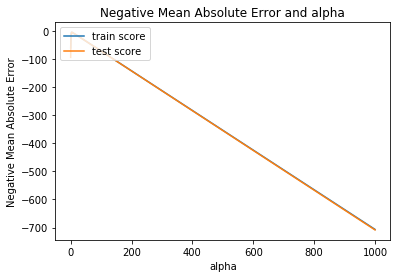

In [618]:
# plotting mean test and train scoes with alpha 
lasso_results['param_alpha'] = lasso_results['param_alpha'].astype('float32')

# plotting
plt.plot(lasso_results['param_alpha'], lasso_results['mean_train_score'])
plt.plot(lasso_results['param_alpha'], lasso_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [619]:
lasso_results = pd.DataFrame(model_lasso.cv_results_)
lasso_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.012167      0.000746         0.000998    3.504023e-07      0.0001   
1        0.011967      0.001262         0.001796    3.993275e-04       0.001   
2        0.012765      0.002310         0.001796    9.777597e-04        0.01   
3        0.012167      0.001164         0.001197    3.997809e-04        0.05   
4        0.013164      0.001465         0.001197    3.990178e-04         0.1   
5        0.011769      0.002474         0.000997    1.122341e-06         0.2   
6        0.009374      0.001197         0.001397    4.884998e-04         0.3   
7        0.010372      0.001739         0.001197    3.986598e-04         0.4   
8        0.008975      0.000892         0.000998    6.309774e-04         0.5   
9        0.011170      0.002631         0.000998    3.162980e-07         0.6   
10       0.013763      0.001163         0.000998    6.743496e-07         0.7   
11       0.014427      0.001863         0.000884    7.876215e-04         0.8   
12       0.009373      0.007653         0.002420    4.840469e-03         0.9   
13       0.014561      0.001018         0.001197    3.989464e-04           1   
14       0.012167      0.000746         0.001197    3.985646e-04           2   
15       0.013364      0.001739         0.001397    7.988938e-04           3   
16       0.005793      0.003167         0.002212    2.930565e-03           4   
17       0.008448      0.003216         0.000000    0.000000e+00           5   
18       0.007698      0.003902         0.001611    3.222942e-03           6   
19       0.011935      0.002763         0.000399    7.976532e-04           7   
20       0.009832      0.000404         0.002415    2.947859e-03           8   
21       0.007477      0.003797         0.002605    2.815894e-03           9   
22       0.008452      0.001061         0.001002    8.966272e-04          10   
23       0.008034      0.002986         0.002004    2.618139e-03          20   
24       0.006044      0.004218         0.000403    8.057594e-04          50   
25       0.006033      0.004214         0.002008    3.107308e-03         100   
26       0.005626      0.002894         0.003043    3.114246e-03         500   
27       0.005385      0.000489         0.001396    4.886168e-04        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}        -134.075501         -86.910834   
1    {'alpha': 0.001}        -134.030245         -86.850784   
2     {'alpha': 0.01}        -133.578152         -86.250136   
3     {'alpha': 0.05}        -131.584720         -82.189940   
4      {'alpha': 0.1}        -129.071642         -78.849775   
5      {'alpha': 0.2}        -124.089155         -70.908957   
6      {'alpha': 0.3}        -118.898425         -64.565262   
7      {'alpha': 0.4}        -114.048460         -56.982085   
8      {'alpha': 0.5}        -112.456374         -50.006715   
9      {'alpha': 0.6}        -107.707162         -44.491370   
10     {'alpha': 0.7}         -75.091749         -38.182692   
11     {'alpha': 0.8}         -61.632065         -33.672043   
12     {'alpha': 0.9}         -56.880078         -28.282605   
13     {'alpha': 1.0}         -52.163225         -23.053074   
14     {'alpha': 2.0}         -15.990107          -6.161200   
15     {'alpha': 3.0}          -4.492180          -2.705333   
16     {'alpha': 4.0}          -5.326366          -3.092188   
17     {'alpha': 5.0}          -5.748708          -4.319834   
18     {'alpha': 6.0}          -4.571977          -4.024738   
19     {'alpha': 7.0}          -5.333973          -4.672884   
20     {'alpha': 8.0}          -6.095970          -6.506555   
21     {'alpha': 9.0}          -6.857966          -7.028818   
22    {'alpha': 10.0}          -7.619962          -6.689155   
23      {'alpha': 20}         -15.239924         -13.455253   
24      {'alpha': 50}         -38.099810         -33.638132   
25     {'alpha': 100}         -76.199619     

In [620]:
#checking the value of optimum number of parameters
print(model_lasso.best_params_)
print(model_lasso.best_score_)

{'alpha': 4.0}
-3.6363397275028984


In [621]:
alpha =4

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=4, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [622]:
#lets predict the R-squared value of test and train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9999999973352532


#### Evaluate the model

In [623]:
#lets predict the R-squared value of test and train data
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9999999973174478


In [624]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, y_test_pred))

RMSE is: 
 16.770786800817604


In [606]:
lasso.coef_

array([-0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  9.93995721e-01,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  7.88755610e+04, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -

#### Most Important Features

In [607]:
#Create feature list and assign coefficients
fieldList = np.array(list(X_train)).reshape(-1,1)

coeffs = np.reshape(np.round(lasso.coef_,5),(-1,1))
coeffs=np.concatenate((fieldList,coeffs),axis=1)
df = pd.DataFrame(coeffs,columns=['Field','Coeff'])
df['Coeff'] = df['Coeff'].astype(float)

In [608]:
df.reindex(df.Coeff.abs().sort_values(ascending = False).index)

Field        Coeff
34               SalePrice  78875.56101
3              OverallQual      0.99400
160  SaleCondition_Partial      0.00000
50    Neighborhood_Edwards     -0.00000
57     Neighborhood_NWAmes      0.00000
56    Neighborhood_NPkVill     -0.00000
55      Neighborhood_NAmes     -0.00000
54    Neighborhood_Mitchel     -0.00000
53    Neighborhood_MeadowV     -0.00000
52     Neighborhood_IDOTRR     -0.00000
51    Neighborhood_Gilbert      0.00000
48    Neighborhood_CollgCr      0.00000
49    Neighborhood_Crawfor      0.00000
59    Neighborhood_NridgHt      0.00000
47    Neighborhood_ClearCr      0.00000
46    Neighborhood_BrkSide     -0.00000
45     Neighborhood_BrDale     -0.00000
44    Neighborhood_Blueste     -0.00000
43        LotConfig_Others      0.00000
42        LotConfig_Inside     -0.00000
58    Neighborhood_NoRidge      0.00000
60    Neighborhood_OldTown     -0.00000
40         LandContour_Low      0.00000
70       HouseStyle_1Story     -0.00000
77        RoofStyle_Others      0.00000
76           RoofStyle_Hip      0.00000
75         HouseStyle_SLvl     -0.00000
74       HouseStyle_SFoyer     -0.00000
73       HouseStyle_2Story      0.00000
72       HouseStyle_2.5Unf     -0.00000
..                     ...          ...
89     Exterior1st_Wd Sdng     -0.00000
99            ExterCond_TA      0.00000
88     Exterior1st_VinylSd      0.00000
87      Exterior1st_Stucco     -0.00000
86       Exterior1st_Stone      0.00000
85     Exterior1st_Plywood     -0.00000
84     Exterior1st_MetalSd     -0.00000
83     Exterior1st_ImStucc      0.00000
82     Exterior1st_HdBoard     -0.00000
98            ExterCond_Gd     -0.00000
100      Foundation_Others     -0.00000
118       BsmtFinType2_LwQ     -0.00000
110        BsmtExposure_No     -0.00000
117       BsmtFinType2_GLQ      0.00000
116       BsmtFinType2_BLQ     -0.00000
115       BsmtFinType1_Unf     -0.00000
114       BsmtFinType1_Rec     -0.00000
113       BsmtFinType1_LwQ     -0.00000
112       BsmtFinType1_GLQ      0.00000
111       BsmtFinType1_BLQ     -0.00000
109        BsmtExposure_Mn      0.00000
101       Foundation_PConc      0.00000
108        BsmtExposure_Gd      0.00000
107            BsmtCond_TA      0.00000
106            BsmtCond_Po     -0.00000
105            BsmtCond_Gd      0.00000
104            BsmtQual_TA     -0.00000
103            BsmtQual_Gd      0.00000
102            BsmtQual_Fa     -0.00000
0               MSSubClass     -0.00000

[161 rows x 2 columns]